In [ ]:
!pip3 install opencv-python
!pip3 install PyWavelets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

(1350, 1080, 3)


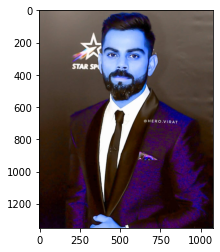

In [2]:
img = cv2.imread('./test_images/kohli/1.kohli.jpg')
print(img.shape)
plt.imshow(img)

(1350, 1080)


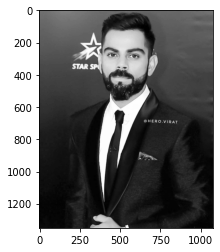

In [3]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray,cmap='gray')

In [4]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray)
eyes = eye_cascade.detectMultiScale(gray)

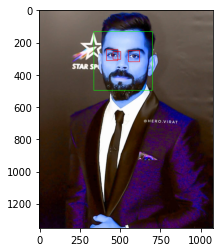

In [5]:
for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()
cv2.destroyAllWindows()

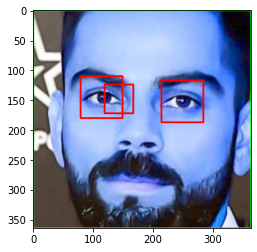

In [6]:
plt.imshow(roi_color,cmap='gray')

In [7]:
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray,1.3,5)
        for(x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >=2:   
                return roi_color

In [8]:
path_to_data = './test_images/'
path_to_crop = './test_images/cropped/'

In [9]:
import os
img_dirs =[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [10]:
img_dirs

['./test_images/sachin',
 './test_images/abhi',
 './test_images/ronaldo',
 './test_images/djokovic',
 './test_images/kohli',
 './test_images/sindhu',
 './test_images/dhoni']

### Generating Cropped folder and images

In [11]:
import shutil
if os.path.exists(path_to_crop):
    shutil.rmtree(path_to_crop)
os.mkdir(path_to_crop)


cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_crop + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

sachin
Generating cropped images in folder:  ./test_images/cropped/sachin
abhi
Generating cropped images in folder:  ./test_images/cropped/abhi


[ WARN:0@115.234] global /io/opencv/modules/imgcodecs/src/grfmt_tiff.cpp (462) readData OpenCV TIFF: TIFFRGBAImageOK: Sorry, requested compression method is not configured


ronaldo
Generating cropped images in folder:  ./test_images/cropped/ronaldo
djokovic
Generating cropped images in folder:  ./test_images/cropped/djokovic
kohli
Generating cropped images in folder:  ./test_images/cropped/kohli
sindhu
Generating cropped images in folder:  ./test_images/cropped/sindhu
dhoni
Generating cropped images in folder:  ./test_images/cropped/dhoni


In [12]:
celebrity_file_names_dict

{'sachin': ['./test_images/cropped/sachin/sachin1.png',
  './test_images/cropped/sachin/sachin2.png',
  './test_images/cropped/sachin/sachin3.png',
  './test_images/cropped/sachin/sachin4.png',
  './test_images/cropped/sachin/sachin5.png',
  './test_images/cropped/sachin/sachin6.png',
  './test_images/cropped/sachin/sachin7.png',
  './test_images/cropped/sachin/sachin8.png',
  './test_images/cropped/sachin/sachin9.png',
  './test_images/cropped/sachin/sachin10.png',
  './test_images/cropped/sachin/sachin11.png',
  './test_images/cropped/sachin/sachin12.png',
  './test_images/cropped/sachin/sachin13.png',
  './test_images/cropped/sachin/sachin14.png',
  './test_images/cropped/sachin/sachin15.png',
  './test_images/cropped/sachin/sachin16.png',
  './test_images/cropped/sachin/sachin17.png',
  './test_images/cropped/sachin/sachin18.png',
  './test_images/cropped/sachin/sachin19.png',
  './test_images/cropped/sachin/sachin20.png',
  './test_images/cropped/sachin/sachin21.png',
  './test_im

## Feature Extraction using Wavelet Transformation 

In [13]:
import pywt

def w2d(img,mode='haar',level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255
    coeffs  = pywt.wavedec2(imArray,mode,level = level)
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    
    imArray_H = pywt.waverec2(coeffs_H,mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

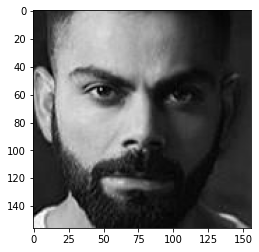

In [14]:
cropped_image = cv2.imread('./test_images/cropped/kohli/kohli1.png')
plt.imshow(cropped_image)

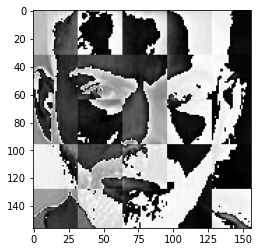

In [15]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [16]:
img_no = {}
count = 0
for name in celebrity_file_names_dict.keys():
    img_no[name] = count
    count+=1
img_no    

{'sachin': 0,
 'abhi': 1,
 'ronaldo': 2,
 'djokovic': 3,
 'kohli': 4,
 'sindhu': 5,
 'dhoni': 6}

In [17]:
X = []
Y = []
for name, training_images in celebrity_file_names_dict.items():
    for training_image in training_images:
        img = cv2.imread(training_image)
        if img is not None:
            scaled_raw_img = cv2.resize(img,(32,32))
            wt_img = w2d(img,'db1',5)
            scaled_wt_img = cv2.resize(wt_img,(32,32))
            combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_wt_img.reshape(32*32,1)))
            X.append(combined_img)
            Y.append(img_no[name])
        

[ WARN:0@665.867] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('./test_images/cropped/sachin/sachin11.png'): can't open/read file: check file path/integrity
[ WARN:0@665.867] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('./test_images/cropped/sachin/sachin12.png'): can't open/read file: check file path/integrity
[ WARN:0@665.998] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('./test_images/cropped/sachin/sachin42.png'): can't open/read file: check file path/integrity
[ WARN:0@666.289] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('./test_images/cropped/ronaldo/ronaldo30.png'): can't open/read file: check file path/integrity
[ WARN:0@666.414] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('./test_images/cropped/ronaldo/ronaldo57.png'): can't open/read file: check file path/integrity
[ WARN:0@666.681] global /io/opencv/modul

In [18]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(290, 4096)

In [19]:
X[0]

array([ 58.,  53.,  94., ..., 249.,  10.,   5.])

## Training the model 

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 10)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

algos = {
               
        'SVM': 
         {
            'model': svm.SVC(gamma='auto',probability=True),
            'params' : {
                'C': [1,10,100,1000],
                'kernel': ['rbf','linear']
                       }  
         },
        'Logistic Regression' : 
         {
            'model': LogisticRegression(solver='liblinear',multi_class='auto'),
            'params': {
                'C': [1,5,10]
                      }
         },
        'Random Forest': 
         {
            'model': RandomForestClassifier(),
            'params' : {
                'n_estimators': [1,5,10]
                       }
         },
        'Linear Regression' :
         {
            'model' : LinearRegression(),
            'params': {
                'normalize' : [True,False]
                      }
         },
        
        'Lasso' : 
         {
            'model' : Lasso(),
            'params': {
                'alpha' : [1,2],
                'selection' : ['random','cyclic']
                } 
         },
        'Decision Tree' : 
         {
            'model' : DecisionTreeRegressor(),
            'params':{
                'criterion' : ['mse','friedman_mse'],
                'splitter'  : ['best','random']
                }
         }
    }

In [22]:
scores = []
best_estimators = {}
cv = ShuffleSplit(n_splits=5,test_size=0.2)
for algo_name, mp in algos.items():
    gs = GridSearchCV(mp['model'],mp['params'],cv=cv,return_train_score = False)
    gs.fit(X,Y)
    scores.append({
            'Model' : algo_name,
            'Best Score' : gs.best_score_,
            'Best Params' : gs.best_params_
        })
    best_estimators[algo_name] = gs.best_estimator_
        
df = pd.DataFrame(scores,columns=['Model','Best Score','Best Params'])
df

/home/anup/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/home/anup/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

m

/home/anup/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/anup/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


,Model,Best Score,Best Params
0,SVM,0.751724,"{'C': 1, 'kernel': 'linear'}"
1,Logistic Regression,0.734483,{'C': 1}
2,Random Forest,0.603448,{'n_estimators': 10}
3,Linear Regression,0.353966,{'normalize': True}
4,Lasso,0.122036,"{'alpha': 2, 'selection': 'random'}"
5,Decision Tree,-0.311961,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [23]:
best_model = best_estimators['Logistic Regression']
best_model

LogisticRegression(C=1, solver='liblinear')

Text(69.0, 0.5, 'Actual')

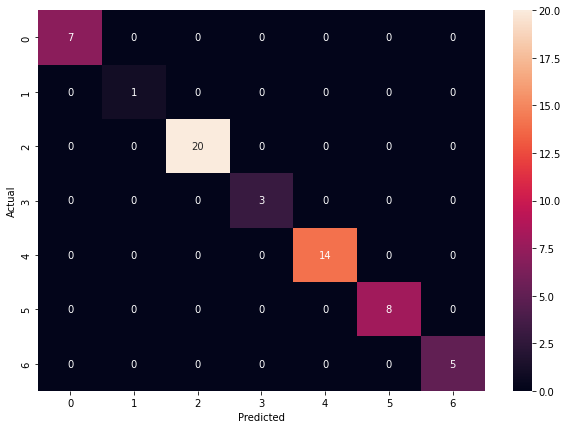

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test,best_model.predict(X_test))
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Saving our trained model & Json file 

In [25]:
import pickle
with open('Image Classification.pkl','wb') as f:
    pickle.dump(best_model,f)

In [26]:
import json
with open('img_label.json','w') as f:
    f.write(json.dumps(img_no))